In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [189]:
data = pd.read_csv('E:\毕业论文\数据\GOOG.csv')

In [190]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [191]:
close = df['Adj Close'].values.reshape(-1,1)
scaler = MinMaxScaler()
close_scaled = scaler.fit_transform(close)

In [192]:
len(data)

4949

In [193]:
p = 30
n = len(close_scaled)

In [196]:
x = np.array([close_scaled[k:k + p] for k in range(n - p + 1)])
y = np.array(close_scaled[p:])
X = x[:-1]
X = X[:, :, np.newaxis]

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [199]:
model = Sequential()

In [200]:
model.add(Conv1D(64, 4, padding='same', activation='relu', input_shape=(p, 1)))  # 64个filter卷积核 大小4

In [201]:
model.add(MaxPooling1D(2))  # 每两个取一个大的   数据会减少一半

In [202]:
model.add(Flatten())  # 把二维数据变成一维的

In [203]:
model.add(Dense(50))  # 50个神经元的全连接层
model.add(Dropout(0.2))  # 防止过拟合 20%权重冻结
model.add(Activation('relu'))

In [204]:
model.add(Dense(1))  # 输出层 是一个一维的全连接神经网络
model.add(Activation('sigmoid'))

In [205]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.2))

In [206]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ (None, 30, 64)              │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 960)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 50)                  │          48,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,421 (189.14 KB)

 Trainable params: 48,421 (189.14 KB)

 Non-trainable params: 0 (0.00 B)

In [209]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0587 
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8699e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7823e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6020e-04
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8751e-04
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9363e-04
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3142e-04
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3487e-04
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

In [210]:
y_predict = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [211]:
y_test = scaler.inverse_transform(y_test)
y_predict = scaler.inverse_transform(y_predict)

In [212]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_predict))
mae = mean_absolute_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)
corr_coef = np.corrcoef(Y_test.T, Y_predict.T)[0][1]
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)
print('Correlation coefficient:', corr_coef)

RMSE: 0.017917375623979284
MAE: 0.01278224899608521
R2: 0.9936032391501257
Correlation coefficient: 0.9971224117294872


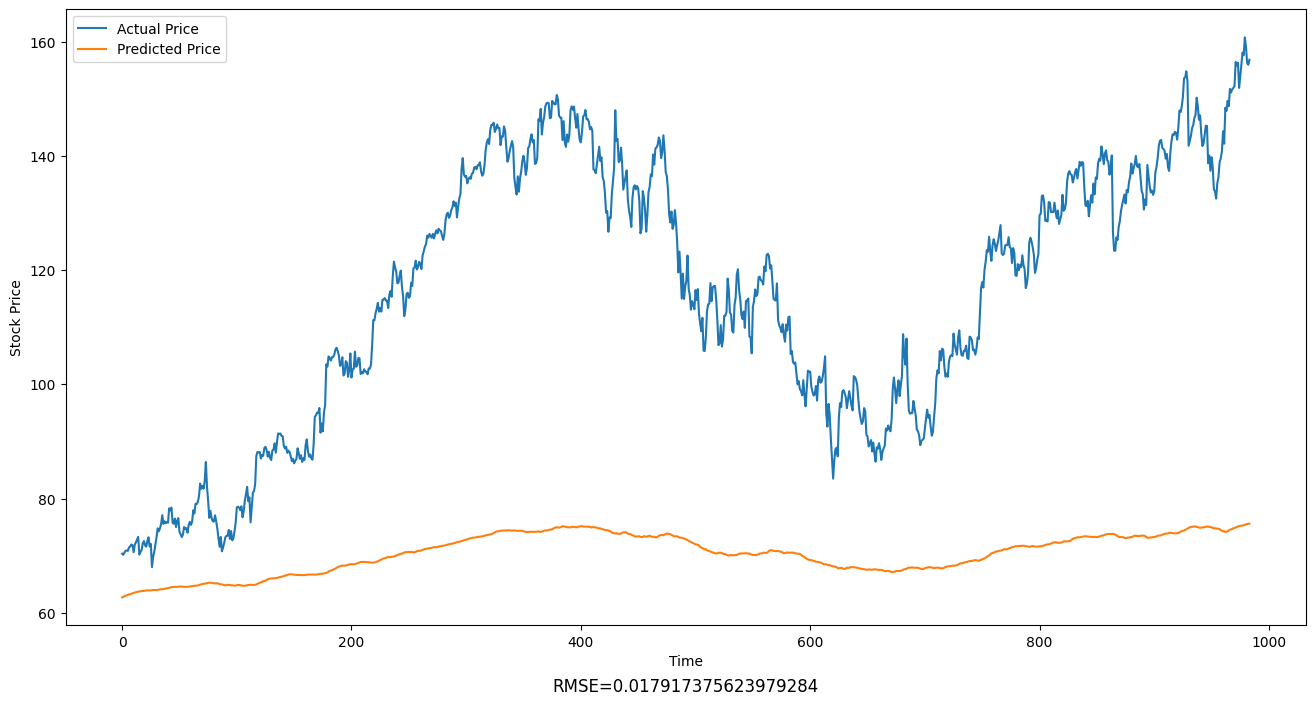

In [237]:
plt.figure(figsize=(16,8))
plt.plot(y_test, label='Actual Price')
plt.plot(y_predict, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('RMSE='+str(rmse), y=-0.12)
plt.legend()
plt.show()